# Joy of Tech - Python Coding

<img src="python_logo.png" style="margin-left: auto; margin-right: auto;" width="200">

Ed Schofield

In [1]:
print('Hello, Girls in Tech! \U0001f4e3')

## Who am I?

- Dr Edward Schofield (or just "Ed")
- Founder and CEO of Python Charmers: https://pythoncharmers.com
- Based in Melbourne, Australia.


We work with Girls in Tech delivering the CODE G bootcamps and Global Classroom program.

We teach short courses worldwide in Python and Data Science.

<img src="ed_telescope_cropped.png" width="200" style="margin-left: auto; margin-right: auto;">

## Goal

You can find plenty of other resources to show that coding skills are "important".

Here we'll focus on what's possible -- and what's fun.

Add a megaphone emoji with \U0001f4e3 (megaphone) / \u265b (♛)

In [2]:
# This makes plots bigger and sharper:
%config InlineBackend.figure_format = 'svg'

## Structure

- 10 live demos of ~3.5 mins each

What could possible go wrong? 😀

## Demo #1: emoji

In [3]:
from emoji import emojize, demojize

In [4]:
emojize(':megaphone:')

In [5]:
demojize('📣')

In [6]:
demojize('♻️')

In [7]:
emojize(':broccoli:')

In [8]:
emojize(':drum: :dragon: :sparkles:')

In [9]:
icecream = emojize(':soft_ice_cream:')
filename = icecream + '.txt'

In [10]:
from pathlib import Path

Path(filename).write_text(icecream * 100);

In [11]:
!ls *.txt

requirements.txt 🍦.txt


In [12]:
# This is for macOS only. For other operating systems, open the file manually:
#!open 🍦.txt

<img src="icecream_text_editor_screenshot.png" width=600>

Ask the audience to type into the chat where they are from.

### Where are you from?

Type it in the chat!

e.g. "Reykjavik, Iceland"

Photos: pre-seeded. 

US: biggest audience. Pick a few.

New York
San Francisco
Seattle
Chicago
Rio de Janeiro
Paris
London
Singapore
Wellington
Melbourne

In [13]:
cities = '''
Melbourne, Australia
San Francisco, United States
Lagos, Nigeria
Singapore, Singapore
Reykjavik, Iceland
Kyoto, Japan
Lyon, France
Hong Kong, China
'''

In [14]:
# More ...
cities += '''
Wellington, New Zealand
Cairo, Egypt
Santiago, Chile
Istanbul, Turkey
London, United Kingdom
New York, United States
Seattle, United States
'''

In [15]:
import pandas as pd
from io import StringIO

places = pd.read_csv(StringIO(cities),
                     names=['City', 'Country'],
                     skipinitialspace=True)

places

,City,Country
0,Melbourne,Australia
1,San Francisco,United States
2,Lagos,Nigeria
3,Singapore,Singapore
4,Reykjavik,Iceland
5,Kyoto,Japan
6,Lyon,France
7,Hong Kong,China
8,Wellington,New Zealand
9,Cairo,Egypt


### Emoji flags

In [16]:
emojize(':Iceland:')

'🇮🇸'

In [17]:
def get_flag(country):
    return emojize(f':{country}:')

In [18]:
places['Flag'] = places['Country'].str.replace(' ', '_').apply(get_flag)

In [19]:
places

,City,Country,Flag
0,Melbourne,Australia,🇦🇺
1,San Francisco,United States,🇺🇸
2,Lagos,Nigeria,🇳🇬
3,Singapore,Singapore,🇸🇬
4,Reykjavik,Iceland,🇮🇸
5,Kyoto,Japan,🇯🇵
6,Lyon,France,🇫🇷
7,Hong Kong,China,🇨🇳
8,Wellington,New Zealand,🇳🇿
9,Cairo,Egypt,🇪🇬


In [20]:
places.to_excel('places.xlsx', index=False)

In [21]:
# This is for macOS only. For other operating systems, open the file manually:
#!open places.xlsx

## Demo #2: Sending a text message

There are API services for messaging like Twilio.

In [22]:
message = emojize('Hello :sparkles:!')
message

'Hello ✨!'

This uses the Telstra Messaging API: https://dev.telstra.com. To use it, you'll need to sign up for an API key.


In [23]:
from messaging import sms

sms('+61405676229', message)

<img src="SMS_screenshot.jpg" width=200>

… or many messages.

Use case: Customer notifications (Uber, Amazon, Apple, DHL, ...)

### Loops: computers 🧡 repetition

In [24]:
from time import sleep

for i in range(5):
    print(message)
    sleep(1)

Hello ✨!
Hello ✨!
Hello ✨!
Hello ✨!
Hello ✨!


In [25]:
from tqdm import tqdm as progress

print('Sending 1 million notifications ...', flush=True)
for i in progress(range(10**6)):
    sleep(10**-6)

Sending 1 million notifications ...


100%|██████████| 1000000/1000000 [00:04<00:00, 223085.55it/s]


## Demo #3: Fetching images via an API

<img src="https://dog.ceo/img/dog.jpg" width=300>

In [26]:
import requests

dog_breeds_url = 'https://dog.ceo/api/breeds/list/all'
response = requests.get(dog_breeds_url)
breeds = response.json()['message']

list(breeds)[:10]

['affenpinscher',
 'african',
 'airedale',
 'akita',
 'appenzeller',
 'australian',
 'basenji',
 'beagle',
 'bluetick',
 'borzoi']

Wrapping code in a function lets you call it at will.

In [27]:
import random
from IPython.display import Image

def get_dog(breed):
    dog_url = f'https://dog.ceo/api/breed/{breed}/images'
    response = requests.get(dog_url)
    photo_urls = response.json()['message']
    photo_url = random.choice(photo_urls)
    response = requests.get(photo_url)
    return Image(response.content)

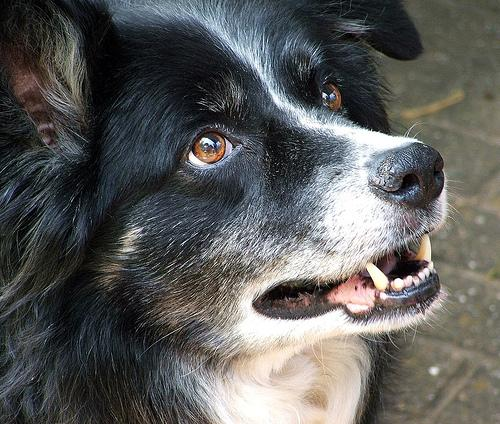

In [28]:
dog = get_dog('collie')
dog

## Demo #4: Gluing together different services

What's next? We can use Python to glue together many different web services. This shows sending a photo to a phone via MMS:

In [29]:
from messaging import mms

mms('+61405676229', dog)

<img src="MMS_screenshot.jpg" width=200>

Now we can add an interface allowing user selection:

In [30]:
from ipywidgets import interact

interact(get_dog, breed=list(breeds));

interactive(children=(Dropdown(description='breed', options=('affenpinscher', 'african', 'airedale', 'akita', …

<img src="interact_dog_screenshot.png" width=400>

We'll come back to more kinds of interactivity later.

### Wikipedia

There's a Python package for almost everything ...

In [31]:
import wikipedia

page = wikipedia.page('Girls in Tech')
page.content[:200]

'Girls in Tech is a global non-profit organization focused on the engagement, education, and empowerment of women in technology. Founded in 2007 by Adriana Gascoigne, the organization has grown from Sa'

### Word clouds

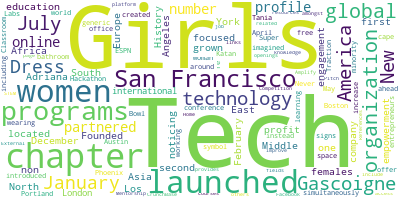

In [32]:
import wordcloud

c = wordcloud.WordCloud(background_color='white')

c.generate(page.content).to_image()

### Code re-use

We can link these two with another custom function:

In [33]:
def wikicloud(search_term):
    page = wikipedia.page(search_term, auto_suggest=False)
    c = wordcloud.WordCloud(background_color='white')
    return c.generate(page.content).to_image()

Now a custom "Wikicloud" is just a function call away ...

## Demo #5: Interactivity

In [34]:
from ipywidgets import interact_manual

interact_manual(wikicloud, search_term='Girls in Tech');

interactive(children=(Text(value='Girls in Tech', description='search_term'), Button(description='Run Interact…

<img src="interact_wikicloud_screenshot.png" width=400>

### City photos

In [35]:
page = wikipedia.page(title='London')

photos = [url for url in page.images if url.endswith('.jpg')]

In [36]:
show_image = lambda url: Image(url)

interact(show_image, url=photos);

interactive(children=(Dropdown(description='url', options=('https://upload.wikimedia.org/wikipedia/commons/4/4…

<img src="interact_wikiimage_screenshot.png" width=800>

## Demo #6: Real-time services: weather right now

These days there are over a million APIs available.

Here I'll use one called OpenWeatherMap for fetching weather data from anywhere on Earth.

In [37]:
from tools import weather_url, weather_api_key

weather_url

'https://api.openweathermap.org/data/2.5/weather'

In [38]:
def get_weather(city):
    params = {'q': city, 'appid': weather_api_key, 'units': 'metric'}
    response = requests.get(weather_url, params)
    if response.status_code != 200:
        return None
    weather = response.json()
    return weather

In [39]:
from pprint import pprint    # pretty print

pprint(get_weather('Reykjavik,IS'))

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 64.14, 'lon': -21.9},
 'dt': 1599699517,
 'id': 3413829,
 'main': {'feels_like': 3.72,
          'humidity': 81,
          'pressure': 1001,
          'temp': 9,
          'temp_max': 9,
          'temp_min': 9},
 'name': 'Reykjavik',
 'sys': {'country': 'IS',
         'id': 91,
         'sunrise': 1599719846,
         'sunset': 1599768708,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 6.2}}


### Temperatures

In [40]:
from tools import get_temperature

get_temperature('Reykjavik,IS')

9

### Weather icons

The API provides URLs of little icons representing the weather.

<img src="openweathermap_result_icon_highlight.png" width=300>

Here's how we can display these.

In [41]:
def get_icon_url(icon_code, size=2):
    return f'http://openweathermap.org/img/wn/{icon_code}@{size}x.png'

def get_icon(icon_code, size=2):
    return Image(get_icon_url(icon_code, size))

In [42]:
# For the live presentation, this makes use of the pre-downloaded icons for speed:
from tools import get_icon

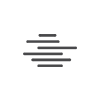

In [43]:
def weather_icon(city, size=2):
    weather = get_weather(city)
    icon_code = weather['weather'][0]['icon']
    return get_icon(icon_code, size=size)

weather_icon('Seattle,US')

Can we apply this function to every row? Not yet: the API requires ISO country codes to disambiguate city names from different countries.

This loads a countries dataset from another file:

In [44]:
all_countries = pd.read_hdf('countries.h5')

all_countries[:8]

,Country Code,Capital
Country,,
Afghanistan,AF,Kabul
Albania,AL,Tirana
Algeria,DZ,Algiers
Andorra,AD,Andorra la Vella
Angola,AO,Luanda
Antigua and Barbuda,AG,St. John's
Azerbaijan,AZ,Baku
Argentina,AR,Buenos Aires


### Joining datasets

This code (using the *Pandas* package) performs a database-style "join" operation to fetch the country code for all the participants' locations.

In [45]:
places = places.set_index(
    'Country'
).join(
    all_countries['Country Code']
).reset_index()

places[:8]

,Country,City,Flag,Country Code
0,Australia,Melbourne,🇦🇺,AU
1,Chile,Santiago,🇨🇱,CL
2,China,Hong Kong,🇨🇳,CN
3,Egypt,Cairo,🇪🇬,EG
4,France,Lyon,🇫🇷,FR
5,Iceland,Reykjavik,🇮🇸,IS
6,Japan,Kyoto,🇯🇵,JP
7,New Zealand,Wellington,🇳🇿,NZ


### Applying the `get_temperature` function to every row

In [46]:
places['Location'] = places['City'] + ',' + places['Country Code']

places['Temperature'] = places['Location'].apply(get_temperature)

places

,Country,City,Flag,Country Code,Location,Temperature
0,Australia,Melbourne,🇦🇺,AU,"Melbourne,AU",14.42
1,Chile,Santiago,🇨🇱,CL,"Santiago,CL",15.76
2,China,Hong Kong,🇨🇳,CN,"Hong Kong,CN",26.81
3,Egypt,Cairo,🇪🇬,EG,"Cairo,EG",26.00
4,France,Lyon,🇫🇷,FR,"Lyon,FR",16.82
5,Iceland,Reykjavik,🇮🇸,IS,"Reykjavik,IS",9.00
6,Japan,Kyoto,🇯🇵,JP,"Kyoto,JP",25.90
7,New Zealand,Wellington,🇳🇿,NZ,"Wellington,NZ",13.44
8,Nigeria,Lagos,🇳🇬,NG,"Lagos,NG",22.77
9,Singapore,Singapore,🇸🇬,SG,"Singapore,SG",27.21


### Spreadsheet output

Some people like Excel spreadsheets ...

In [47]:
places.to_excel('temperatures.xlsx', index=False)

In [48]:
# This is for macOS only. For other operating systems, open the file manually:
#!open temperatures.xlsx

## Demo #7: biofuel-powered cars

![](biofuels.jpg)

If we powered all the cars on a road using biofuels grown on the verge of the road, how wide would the verge have to be?

This is Sir David Mackay's biofuels example from here:

   http://www.inference.eng.cam.ac.uk/sustainable/blog/PoweringTransport.html

<img src="https://www.free-ebooks.net/2d_covers/large/1389687436.jpg" style="float: left;">

<img src="https://upload.wikimedia.org/wikipedia/en/0/02/David-john-cameron-mackay-by-david-stern.jpg"  style="float: right;">

#### Assumptions
- one lane of cars travelling 60 miles per hour
- average car fuel consumption: 30 miles per imperial gallon
- 80 metres spacing between cars
- 1200 litres of biofuel grown per hectare per year

In [49]:
from pint import UnitRegistry

u = UnitRegistry()

In [50]:
speed = 60 * u.mile / u.hour
fuel_consumption = 30 * u.mile / u.imperial_gallon
car_spacing = 80 * u.meter
biofuel_productivity = 1200 * u.liter / u.hectare / u.year

#### Quick answer: speed divided by the other three terms

In [51]:
verge_width = speed / (fuel_consumption * biofuel_productivity * car_spacing)
round(verge_width.to('miles'), 1)

5.2 <Unit('mile')>

In [52]:
round(verge_width.to('km'), 1)

8.3 <Unit('kilometer')>

Hmmm ...

See David Mackay's TED talk for more on the implications of this for renewable energy!

## Demo #8: Math solver

<img src="find_x.png" width=300>

### Series expansion, factoring, integration, simplification, ...

Solve $\sin(x) - 1 = x$ for $x \in \mathcal{R}$

In [53]:
from sympy import *
x, y, z = symbols('x y z')

In [54]:
solveset(sin(x) - 1, x, domain=S.Reals)

ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers)

Compute $ \int_{-\infty}^\infty \int_{-\infty}^\infty e^{-(x^2 + y^2)} dx dy $

In [55]:
integrate(exp(-(x**2 + y**2)), (x, -oo, oo), (y, -oo, oo))

pi

Expand $\exp(\sin(x))$ as a Taylor series.

In [56]:
expr = exp(sin(x))

expr.series(x, 0, 7)

1 + x + x**2/2 - x**4/8 - x**5/15 - x**6/240 + O(x**7)

Simplify $\frac{x^3 + x^2 - x - 1}{x^2 + 2x + 1}$.

In [57]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

x - 1

Easy!

### Investment modelling with Monte Carlo simulation

Ed and Lisa want to save money to buy a house for their 1 year-old daughter, Clara. They want to have $850k saved by the time Clara is finishing university 21 years from now.

What is the probability that they will hit their savings goal?

### Assumptions

- They are planning to save $25k each year (ignore taxes).
- Assume that the return each year is normally distributed (mean 6%, stdev 10%).
- Run a simulation with 100,000 trials

In [58]:
mean_return = 0.06
std_return = 0.1
num_trials = 10**5
years = 21
savings_goal = 850_000

In [59]:
import altair

altair.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [60]:
from tools import savings_hist

interact(savings_hist,
         mean_return=(-0.1, 0.3, 0.02),
         std_return=(0.05, 0.5, 0.02),
         num_trials=10**5,
         years=21,
         annual_deposit=(0, 100_000, 5_000));

interactive(children=(FloatSlider(value=0.06, description='mean_return', max=0.3, min=-0.1, step=0.02), FloatS…

<img src="altair_monte_carlo_screenshot.png" width=400>

## Demo #9: charts and maps

In [61]:
import altair

chart = altair.Chart(places).mark_square().encode(
    color='City',
    x='Temperature',
).interactive()

chart

alt.Chart(...)

### Plotting the data on a map

For this, we need coordinates of each location (latitude and longitude).

Again, there's a Python package for almost everything ...

In [62]:
import wbdata     # World Bank Data

all_countries = wbdata.get_country()

list(all_countries)[0]

{'id': 'ABW',
 'iso2Code': 'AW',
 'name': 'Aruba',
 'region': {'id': 'LCN',
  'iso2code': 'ZJ',
  'value': 'Latin America & Caribbean '},
 'adminregion': {'id': '', 'iso2code': '', 'value': ''},
 'incomeLevel': {'id': 'HIC', 'iso2code': 'XD', 'value': 'High income'},
 'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'},
 'capitalCity': 'Oranjestad',
 'longitude': '-70.0167',
 'latitude': '12.5167'}

In [63]:
import tools

wbdata = tools.cleanup_countries(all_countries)
wbdata[:3]

,id,iso2Code,name,capital,longitude,latitude,incomelevel,color
0,ABW,AW,Aruba,Oranjestad,-70.0167,12.51670,High income,green
1,AFG,AF,Afghanistan,Kabul,69.1761,34.52280,Low income,darkred
3,AGO,AO,Angola,Luanda,13.2420,-8.81155,Lower middle income,red


In [64]:
# from importlib import reload
# reload(tools)

In [65]:
altair.Chart(wbdata).mark_circle().encode(
    x='longitude',
    y='latitude',
    color='incomelevel',
    tooltip='name'
    # size='population'
).interactive()

alt.Chart(...)

Idea: use the World Map example: https://altair-viz.github.io/gallery/world_map.html

### Real interactive maps

In [66]:
from folium import Map, Marker, Icon

mymap = Map(location=[0, 0], zoom_start=2)
mymap

### Where are our participants from?

In [67]:
places[:3]

,Country,City,Flag,Country Code,Location,Temperature
0,Australia,Melbourne,🇦🇺,AU,"Melbourne,AU",14.42
1,Chile,Santiago,🇨🇱,CL,"Santiago,CL",15.76
2,China,Hong Kong,🇨🇳,CN,"Hong Kong,CN",26.81


In [68]:
places2 = places.set_index(
    'Country Code'
).join(
    wbdata.set_index('iso2Code')[['longitude', 'latitude']]
).dropna().reset_index()

In [80]:
places2[:3]

,index,Country,City,Flag,Location,Temperature,longitude,latitude
0,AU,Australia,Melbourne,🇦🇺,"Melbourne,AU",14.42,149.1290,-35.2820
1,CL,Chile,Santiago,🇨🇱,"Santiago,CL",15.76,-70.6475,-33.4750
2,CN,China,Hong Kong,🇨🇳,"Hong Kong,CN",26.81,116.2860,40.0495


In [70]:
markers = [Marker([row.latitude, row.longitude], popup=row.Country, icon=Icon())
           for row in places2.itertuples()]

for marker in markers:
    marker.add_to(mymap)

mymap

Hi to our participants from all these countries! (and all the others ...)

## Demo #10: Image processing

In [71]:
def get_city_photo(city):
    page = wikipedia.page(title=city)
    photos = [url for url in page.images if url.endswith('.jpg')]
    return Image(photos[0])

In [72]:
import toolz as tz

get_city_photo = tz.memoize(get_city_photo)

In [73]:
sg_photo = get_city_photo('Singapore')

In [74]:
# This code converts the downloaded JPEG file into an array so we can manipulate it further
import matplotlib.pyplot as plt
from io import BytesIO

reference = plt.imread(BytesIO(sg_photo.data), format='jpg')

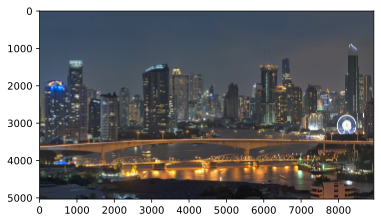

In [75]:
from matplotlib.pyplot import imshow

imshow(reference);

### Histogram matching

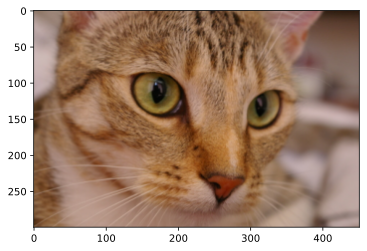

In [76]:
from skimage.data import chelsea

image = chelsea()
imshow(image);

### Histogram matching: Singapore skyline cat

This code will now color Chelsea the cat like the Singapore skyline:

In [77]:
from skimage.exposure import match_histograms

matched = match_histograms(image, reference, multichannel=True)

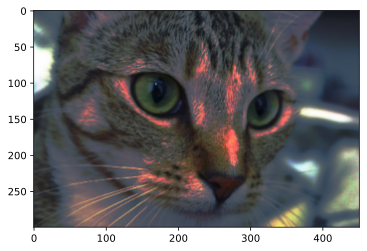

In [78]:
imshow(matched);

## One more thing: PyWeek

Teams of children and teenagers compete each year in PyWeek to create a game using Python: https://pyweek.org

<img src="pyweek_screenshot.png" width=600>

Many amazing games they've created are freely available for you to study, modify, and use for inspiration to create your own.

<img src="python_charmers_logo.svg" width=300 style="float: right;">

## Thanks!

Get in touch!

- Ed Schofield
- www.linkedin.com/in/edschofield0
- ed@pythoncharmers.com
- https://pythoncharmers.com

## Slides available at:
- https://github.com/PythonCharmers/GirlsInTechConference2020


Happy to send you the notebook & code for these demos.